# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [  ] YES - make available
* [ x ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Yang Li
- Yiou Lyu
- Linfeng Hu
- Ruby Celeste Marroquin 

# Group Members IDs

- A15560579
- A15930345
- A15473121
- A16094382

# Research Question

How does the regional economic status of each province in mainland China correlate to its breakout and recovery of COVID-19?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

(Copy this information for each dataset)
- Dataset Name: 
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
import json
import codecs
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import patsy
import scipy.stats as stats

import bs4
from bs4 import BeautifulSoup

# Data Cleaning

In [2]:
#with codecs.open('Data/virus.json', 'r', 'utf-8') as data_file:
    #data_teacher = json.load(data_file, 'utf-8')

#topic[worksheet] = data_teacher[worksheetID]['Topic']
#out = codecs.open('Worksheet.csv', 'w', 'utf-8')
#out.write(topic[worksheet])

To clean our data, our general approach is to represent datasets in pandas dataframe. Then we drop irrelevant information or outliers in data. We also rename the columns to make it easier for later analyses.

Firstly, we deal with the datasets that consist of economic status data. 

This is the income per capita value for each province in mainland China. Income is measured in yuan. 

In [3]:
Income = pd.read_csv('Data/Income.csv')
Income = Income.dropna(axis=1, how='all')
Income.head()

,Region,2018,2017,2016,2015,2014,2013
0,Beijing,62361.22,57229.83,52530.38,48457.99,44488.57,40830.04
1,Tianjin,39506.15,37022.33,34074.46,31291.36,28832.29,26359.20
2,Hebei,23445.65,21484.13,19725.42,18118.09,16647.40,15189.64
3,Shanxi,21990.14,20420.01,19048.88,17853.67,16538.32,15119.72
4,Inner Mongolia,28375.65,26212.23,24126.64,22310.09,20559.34,18692.89


This is the per capita Gross Regional Product value for each province. GRP per capita is measured in yuan.

In [4]:
GRP = pd.read_csv('Data/GRP.csv')
GRP = GRP.dropna(axis=1, how='all')
GRP.head()

,Region,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Beijing,140211,128994,118198,106497,99995,94648,87475,81658,73856,66940
1,Tianjin,120711,118944,115053,107960,105231,100105,93173,85213,72994,62574
2,Hebei,47772,45387,43062,40255,39984,38909,36584,33969,28668,24581
3,Shanxi,45328,42060,35532,34919,35070,34984,33628,31357,26283,21522
4,Inner Mongolia,68302,63764,72064,71101,71046,67836,63886,57974,47347,39735


Next, we move on to clean the population density related datasets.

Population per province here is calculated in the unit of 10000 persons). It includes all residents (permanent and temporary, rural and urban)at the end of that year.

In [5]:
population = pd.read_csv('Data/Population.csv')
population = population.dropna(axis = 1, how = 'all')
population.head()

,Region,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Beijing,2154,2171,2173,2171,2152,2115,2069,2019,1962,1860.0
1,Tianjin,1560,1557,1562,1547,1517,1472,1413,1355,1299,1228.0
2,Hebei,7556,7520,7470,7425,7384,7333,7288,7241,7194,7034.0
3,Shanxi,3718,3702,3682,3664,3648,3630,3611,3593,3574,3427.0
4,Inner Mongolia,2534,2529,2520,2511,2505,2498,2490,2482,2472,2458.0


To calculate population density of a region, we also need to areas of each province. Here, area of each province is measured in unit of square kilometers.

Since we only need the area information of each separate region, we will drop the "Toal" row at the end which contains information about the total area of China(judging by the data contained, the row name should be a typo). We will also drop the proportion row because we only need the area number. 

In [6]:
area = pd.read_csv('Data/Area.csv')
area = area.dropna(axis = 1, how = 'all')
#shorten column names to make following analysis simpler
area = area.rename(columns={"Area (sq.km)": "Area"})
area = area[area.District != 'Toal']
area = area[area.columns[:2]]
area = area.rename(columns = {'District':'Region'})
area.head()

,Region,Area
0,Shanghai,8359
1,Tianjin,"11,917"
2,Beijing,"16,406"
3,Hainan,"35,177"
4,Ningxia,"51,893"


we also need to remove "," in the string in order to change it to type int.

In [7]:
def remove_comma(strin):
    strin = strin.replace(',','')
    return strin

area['Area']= area['Area'].apply(remove_comma)
area.head()

,Region,Area
0,Shanghai,8359
1,Tianjin,11917
2,Beijing,16406
3,Hainan,35177
4,Ningxia,51893


In [ ]:
# read virus data into dataframes 

list_of_virus_data = list()

# append data between Feb 1 and Feb 25 to list
for i in range(20200201,20200226): 
    path = './Data/virus/' + str(i) + '.csv'
    df = pd.read_csv(path)
    df.headers = path
    list_of_virus_data.append(df)
    
# File 20200226.csv is missing, reason unknow. 

    
# append data between Feb 27 and Feb 29 to list
for i in range(20200227,20200230): 
    path = './Data/virus/' + str(i) + '.csv'
    df = pd.read_csv(path)
    df.headers = path
    list_of_virus_data.append(df)

# append data between Mar 1 and  Mar 1 to list
for i in range(20200301,20200302): 
    path = './Data/virus/' + str(i) + '.csv'
    list_of_virus_data.append(pd.read_csv(path))
    
print('number of dataframes for virus: ',len(list_of_virus_data))

# access ith elment in the list using list_of_virus_data[i]
# for example list_of_virus_data[0] gives the first dataframe


## Start cleaning virus data

### Clean 0th to 1th df in the list 

In [ ]:
# Clean 0th to 1th df in the list 
for i in range(0,2):
    # get the df of the ith day
    df = list_of_virus_data[i]
    # use the first data row as column names
    df.columns = df.iloc[0]
    # drop first row, because is was used as header
    df = df.drop(0)
    # drop the column '1', because it is irrlavent
    df = df.drop(1, axis=1)
    # save cleaned data to list_of_virus_data 
    list_of_virus_data[i] = df

### Clean 2th df in the list

In [ ]:
# Clean 2th df in the list
# get the df of the ith day
df = list_of_virus_data[2]
# reset column names
df.columns = ["Province/Region/City", "Confirmed Cases", 1]
# drop meaningless 1" column,  keep "Confirmed Cases" and "Province/Region/City"
df = df.drop(1, axis=1)
# Drop the last row, because it is comment instaed of data
df = df.drop(df.shape[0] - 1)
# save cleaned data to list_of_virus_data 
list_of_virus_data[2] = df

### Clean 3th to 10th df in the list 

In [ ]:
# Clean 3th to 10th df in the list 
for i in range(3,11):
    # get the df of the ith day
    df = list_of_virus_data[i]
    # use the first data row as column names
    df.columns = df.iloc[0]
    # drop first row, because is was used as header
    df = df.drop(0)
    # drop the column '1', because it is irrlavent
    df = df.drop(1, axis=1)
    # save cleaned data to list_of_virus_data
    list_of_virus_data[i] = df

In [ ]:
df1 = list_of_virus_data[1]
df2 = list_of_virus_data[2]
df1.merge(df2,how='left')

# Data Analysis & Results

Correlation between Population density and economic status
This part is to analyze the correlation between population density and economic status. We found the data for both population and area by each province. It needs to be calculated to population density first by dividing population by area.

We decide to use the population data from the most recent year available, which is 2018.
We also need to change the column name to "district" to correspond with the area dataset.

In [8]:
population_2018 = population[population.columns[:2]]
population_2018.head()

,Region,2018
0,Beijing,2154
1,Tianjin,1560
2,Hebei,7556
3,Shanxi,3718
4,Inner Mongolia,2534


we will now merge the population and area dataset by the province name. We choose to "inner" merge them because if there is a province with either no population or area, we are unable to calculate the population density.
Then we could have calculate the population density by dividing population by area.
The unit for population density is number of people per square kilometer.

In [9]:
popu_density = pd.merge(population_2018,area,on = 'Region')
popu_density['Area'] = pd.to_numeric(popu_density['Area'])
popu_density['2018'] = pd.to_numeric(popu_density['2018'])
popu_density['population density'] = popu_density['2018']/popu_density['Area']
popu_density = popu_density.drop(columns = 'Area')
popu_density = popu_density.drop(columns = '2018')
popu_density.head()


,Region,population density
0,Beijing,0.131293
1,Tianjin,0.130905
2,Hebei,0.040075
3,Shanxi,0.023727
4,Shanxi,0.018082


we will now merge the data for population density and economic status by province. Since we use the population data in 2018 for calculating the population density, we will also use GRP in 2018 to find the correlation between population density and economic status.

In [15]:
co_pd_es = pd.merge(popu_density,GRP, on = 'Region')
co_pd_es = co_pd_es[co_pd_es.columns[:3]]
co_pd_es = co_pd_es.rename(columns = {'2018':'GRP'})
co_pd_es.head()

,Region,population density,GRP
0,Beijing,0.131293,140211
1,Tianjin,0.130905,120711
2,Hebei,0.040075,47772
3,Shanxi,0.023727,45328
4,Shanxi,0.018082,45328


Now we can look into the correlation between population density and GRP. we will make a scatter plot of GRP vs. population density and draw the linear regression line to show the relationship.

In [16]:
a1 = np.polyfit(co_pd_es['population density'],co_pd_es['GRP'],deg = 1)[0]
b1 = np.polyfit(co_pd_es['population density'],co_pd_es['GRP'],deg = 1)[1]
a1,b1

(418533.9004044728, 46606.9870364815)

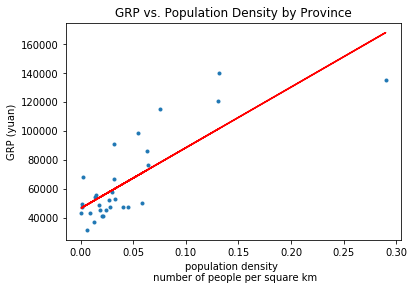

In [26]:
plt.plot(co_pd_es['population density'],co_pd_es['GRP'],'.')
plt.title('GRP vs. Population Density by Province')
plt.xlabel("population density \n number of people per square km" )
plt.ylabel("GRP (yuan)")
pred_GRP = co_pd_es['population density']*a1+b1
plt.plot(co_pd_es['population density'],pred_GRP,'red')

From this plot, it is clear that there is a positive relationship between population density and GRP. The regions with higher population density tend to have higher GRP. Thus, population density might also serve as a factor that confounds with the economic status. 

With better GRP, the province are expected to have a slower breakout rate due to the the better infrastructures like hospitals or clinics to support the citizens against the cirus. However, the breakout rates are actually tend to be higher with province with higher GRP. Population density might be the most important cofounding factor for this controversy. 

Now, we will look at the correlation between population density and the virus breakout rate to see whether they are in fact correlated.

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*